In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
import sys
if ".." not in sys.path: sys.path.append("..")
from common import constants, cosmology

In [19]:
def strong_sphaleron_rate(T):
    N_f = 6
    N_c = 3
    N_H = 1

    B = (11*N_c - 2*n_f) / (12*np.pi)
    alpha_s_at_M_Z = 0.1189
    M_Z = 91.187

    def alpha_s(q):
        return alpha_s_at_M_Z / (1. + 2.0*B * alpha_s_at_M_Z * np.log(q / M_Z))
    
    some_number = 3.041
    g = np.sqrt(4*np.pi*alpha_s(T))
    m_D = np.sqrt((2*N_c + N_f + N_H) / 6 * g**2 * T**2)

    def gamma_eq(gamma):
        return gamma - N_c * alpha_s(T) * T * (np.log(m_D / gamma) + some_number)
    p = - some_number * N_c * alpha_s(T) * T
    q = - N_c * alpha_s(T) * T * m_D
    guess = -p/2 + np.sqrt((p/2)**2 - q)
    sol = root(gamma_eq, guess)
    if not sol.success: return np.nan
    gamma = sol.x[0]

    Gamma_sphal = ( 
        0.21 / 2 * (N_c * g**2 * T**2 / m_D**2) * 
        (np.log(m_D / gamma) + some_number) * 
        (N_c**2 - 1) / N_c**2 * 
        (N_c * alpha_s(T))**5 * T**4
    )
    return Gamma_sphal

In [16]:
g2 = 0.55
g3 = 0.6

def g_to_alpha(g): return g**2 / (4*np.pi)

alpha_2 = g_to_alpha(g2)
alpha_3 = g_to_alpha(g3)

kappa_WS = 24 # for 1e12 GeV
kappa_SS = 2.7e2 # for 1e13 GeV

def calc_weak_sphaleron_rate(T):
    return kappa_WS / 2 * alpha_2**5 * T**4

def calc_strong_sphaleron_rate(T):
    return kappa_SS / 2 * alpha_3**5 * T**4

In [14]:
T_range = np.geomspace(1e15, 1e10, 400)
SS_rate = [strong_sphaleron_rate(T) for T in T_range]

Text(0, 0.5, '$\\Gamma_\\mathrm{SS} * \\mathrm{GeV}^4$')

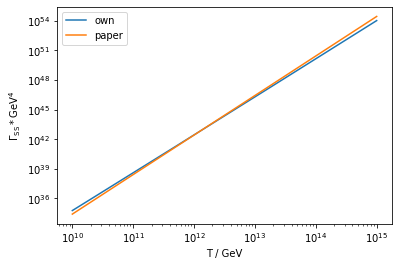

In [18]:
plt.loglog(T_range, SS_rate, label="own")
plt.loglog(T_range, calc_strong_sphaleron_rate(T_range), label="paper")
plt.legend()
plt.xlabel("T / GeV")
plt.ylabel("$\Gamma_\mathrm{SS} * \mathrm{GeV}^4$")